In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

## Problem 1: Tweet Analysis

In [148]:
rectweets= pd.read_json('AOC_recent_tweets.txt')
rectweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2021-02-06 20:22:38+00:00,1358149122264563712,1358149122264563712,RT @RepEscobar: Our country has the moral obli...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-06 20:16:39+00:00,1358147616400408576,1358147616400408576,RT @RoKhanna: What happens when we guarantee $...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-06 20:07:35+00:00,1358145332316667909,1358145332316667904,(Source: https://t.co/3o5JEr6zpd),False,"[0, 33]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.358145e+18,1.358145e+18,...,1026,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN
3,2021-02-06 20:07:07+00:00,1358145218407759875,1358145218407759872,Joe Cunningham pledged to never take corporate...,False,"[0, 156]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.358144e+18,1.358144e+18,...,2880,False,False,en,0.0,"{'media': [{'id': 1358145216155426825, 'id_str...",NaN,NaN,NaN,NaN
4,2021-02-06 20:03:06+00:00,1358144207333036040,1358144207333036032,What’s even more gross is that Mace takes corp...,False,"[0, 197]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7765,False,False,en,0.0,NaN,1.358113e+18,1.358113e+18,"{'url': 'https://t.co/CcVxgDF6id', 'expanded':...",{'created_at': 'Sat Feb 06 18:00:02 +0000 2021...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,2019-10-09 14:14:19+00:00,1181935928249606146,1181935928249606144,Autocrats: “Jump!”\nTrump: “How high?”\n\n- Tr...,False,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,75938,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3243,2019-10-09 14:00:54+00:00,1181932554552827905,1181932554552827904,RT @HeidiNBC: NEW: Donald Trump's decision to ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3244,2019-10-09 14:00:32+00:00,1181932460516478976,1181932460516478976,Trump decision isn’t about drawing down US mil...,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,32256,False,False,en,0.0,NaN,1.181923e+18,1.181923e+18,"{'url': 'https://t.co/ODpoyZI83r', 'expanded':...",{'created_at': 'Wed Oct 09 13:22:07 +0000 2019...
3245,2019-10-09 13:41:17+00:00,1181927615340453899,1181927615340453888,Federal govs are failing to act on the climate...,False,"[0, 283]","{'hashtags': [{'text': 'GreenNewDeal', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7733,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN


In [144]:
rectweets.set_index('id', inplace = True)
print(rectweets)

                                   created_at               id_str  \
id                                                                   
1358149122264563712 2021-02-06 20:22:38+00:00  1358149122264563712   
1358147616400408576 2021-02-06 20:16:39+00:00  1358147616400408576   
1358145332316667909 2021-02-06 20:07:35+00:00  1358145332316667904   
1358145218407759875 2021-02-06 20:07:07+00:00  1358145218407759872   
1358144207333036040 2021-02-06 20:03:06+00:00  1358144207333036032   
...                                       ...                  ...   
1181935928249606146 2019-10-09 14:14:19+00:00  1181935928249606144   
1181932554552827905 2019-10-09 14:00:54+00:00  1181932554552827904   
1181932460516478976 2019-10-09 14:00:32+00:00  1181932460516478976   
1181927615340453899 2019-10-09 13:41:17+00:00  1181927615340453888   
1181804625588051968 2019-10-09 05:32:34+00:00  1181804625588051968   

                                                             full_text  \
id             

In [145]:
rectweets.set_index('created_at', inplace = True)
print(rectweets)

                                        id_str  \
created_at                                       
2021-02-06 20:22:38+00:00  1358149122264563712   
2021-02-06 20:16:39+00:00  1358147616400408576   
2021-02-06 20:07:35+00:00  1358145332316667904   
2021-02-06 20:07:07+00:00  1358145218407759872   
2021-02-06 20:03:06+00:00  1358144207333036032   
...                                        ...   
2019-10-09 14:14:19+00:00  1181935928249606144   
2019-10-09 14:00:54+00:00  1181932554552827904   
2019-10-09 14:00:32+00:00  1181932460516478976   
2019-10-09 13:41:17+00:00  1181927615340453888   
2019-10-09 05:32:34+00:00  1181804625588051968   

                                                                   full_text  \
created_at                                                                     
2021-02-06 20:22:38+00:00  RT @RepEscobar: Our country has the moral obli...   
2021-02-06 20:16:39+00:00  RT @RoKhanna: What happens when we guarantee $...   
2021-02-06 20:07:35+00:00    

In [149]:
def time_in_hours(column):
    return column.dt.hour + column.dt.minute/60 + column.dt.second/3600

rectweets['hours'] = time_in_hours(rectweets['created_at'])
print(rectweets['hours'])

0       20.377222
1       20.277500
2       20.126389
3       20.118611
4       20.051667
          ...    
3242    14.238611
3243    14.015000
3244    14.008889
3245    13.688056
3246     5.542778
Name: hours, Length: 3247, dtype: float64


In [150]:
new_columns = ['created_at', 'hours', 'full_text']
new_df = rectweets[new_columns]


new_df.to_csv('new_data.csv', index=False)

# Problem 2: Planets Planets Planets!

In [166]:
planets = sns.load_dataset('planets')
display(planets)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [162]:
print(planets['year'])

0       2006
1       2008
2       2011
3       2007
4       2009
        ... 
1030    2006
1031    2007
1032    2007
1033    2008
1034    2008
Name: year, Length: 1035, dtype: int64


Text(0.5, 1.0, 'Orbital Period vs. Mass (log-log scale)')

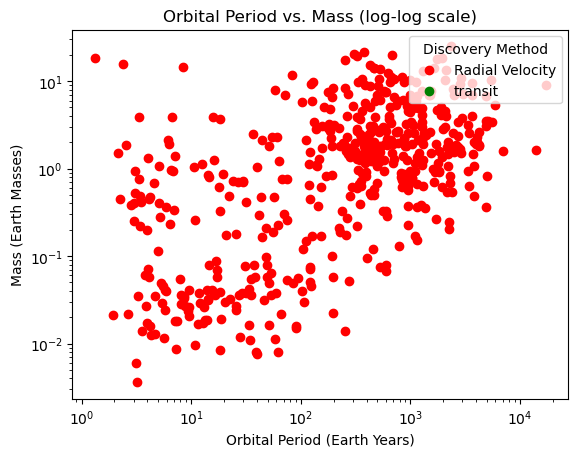

In [167]:
# sns.scatterplot(x = planets['orbital_period'], y = planets['mass'])

colors = {'Radial Velocity': 'red', 'transit': 'green'}

for method, color in colors.items():
    method_data = planets[planets['method'] == method]
    plt.scatter(method_data['orbital_period'], method_data['mass'], color=color, label=method)
    plt.legend(loc='upper right', title='Discovery Method')

plt.xscale('log')
plt.xlabel('Orbital Period (Earth Years)')
plt.yscale('log')
plt.ylabel('Mass (Earth Masses)')
plt.title('Orbital Period vs. Mass (log-log scale)')

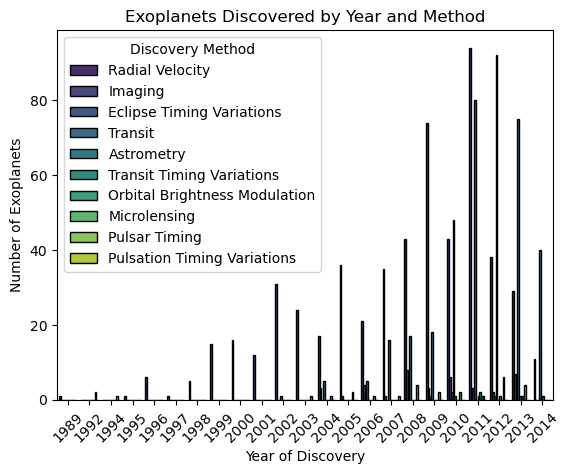

In [170]:

exoplanets = planets.dropna(subset=['year'])

pivot_table = exoplanets.pivot_table(index='year', columns='method', aggfunc='size', fill_value=0)

sns.countplot(data= exoplanets, x='year', hue='method', palette='viridis', edgecolor='black')

plt.xlabel('Year of Discovery')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets Discovered by Year and Method')

plt.xticks(rotation=45)


plt.legend(loc = 'upper left', title='Discovery Method')


# print(exoplanets)